I HAVE NOT CALCULATED THE CLASS WISE ACCURACY YET!!!!

In [1]:
import os,codecs

In [2]:
import numpy as np
import tensorflow as tf
from keras.layers import Dropout
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from keras import initializers
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from array import array

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# PROVIDE YOUR DIRECTORY WITH THE EXTRACTED FILES HERE
datapath = '/content/drive/MyDrive/Colab Notebooks/SML/SML_A4/mnist/'

files = os.listdir(datapath)

def get_int(b):   # CONVERTS 4 BYTES TO A INT
    return int(codecs.encode(b, 'hex'), 16)

data_dict = {}
for file in files:
    if file.endswith('ubyte'):  # FOR ALL 'ubyte' FILES
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            type = get_int(data[:4])   # 0-3: THE MAGIC NUMBER TO WHETHER IMAGE OR LABEL
            length = get_int(data[4:8])  # 4-7: LENGTH OF THE ARRAY  (DIMENSION 0)
            if (type == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])  # NUMBER OF ROWS  (DIMENSION 1)
                num_cols = get_int(data[12:16])  # NUMBER OF COLUMNS  (DIMENSION 2)
                parsed = np.frombuffer(data,dtype = np.uint8, offset = 16)  # READ THE PIXEL VALUES AS INTEGERS
                parsed = parsed.reshape(length,num_rows,num_cols)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES x HEIGHT x WIDTH]           
            elif(type == 2049):
                category = 'labels'
                parsed = np.frombuffer(data, dtype=np.uint8, offset=8) # READ THE LABEL VALUES AS INTEGERS
                parsed = parsed.reshape(length)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES]                           
            if (length==10000):
                set = 'test'
            elif (length==60000):
                set = 'train'
            data_dict[set+'_'+category] = parsed  # SAVE THE NUMPY ARRAY TO A CORRESPONDING KEY

Reading  train-images.idx3-ubyte
Reading  train-labels.idx1-ubyte
Reading  t10k-images.idx3-ubyte
Reading  t10k-labels.idx1-ubyte


data is being used as: numberOfSamples x dimension

In [5]:
train_images = data_dict['train_images'].reshape((-1, 784))
test_images = data_dict['test_images'].reshape((-1, 784))
train_labels = data_dict['train_labels']
test_labels = data_dict['test_labels']

#making the validation set to be used in the training of the model
v_images = test_images[0:600,:]
v_labels = test_labels[0:600]
test_images = test_images[600:,:]
test_labels = test_labels[600:]

In [6]:
v_images.shape
test_images.shape

(9400, 784)

In [7]:

# building the model

model = Sequential()

#adding the input and hidden layer
model.add(Dense(64, input_dim=784, trainable=True, activation='relu', use_bias=True,
                kernel_initializer=initializers.HeNormal(seed=None)))

#adding the dropout layer
model.add(Dropout(0.5))

model.add(Dense(64, use_bias=True))
model.add(BatchNormalization())
model.add(Activation("relu"))

#output layer
model.add(Dense(10, trainable=True, activation='softmax'))

#defining the optimizer
sgd = optimizers.SGD(lr=0.1, momentum=0.9)

#compiling the model
model.compile(
    optimizer=sgd,
    loss="categorical_crossentropy",
    #metrics=['accuracy'],
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:

# I AM NOT DEFINING THE CALLBACKS AT THE MOMENT

# es= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#training the model

history = model.fit(
    x=train_images,
    y=to_categorical(train_labels),
    validation_data=(v_images, to_categorical(v_labels)),
    epochs=31,
    batch_size=512,
    shuffle=True,
    # callbacks=[es, mc],
)

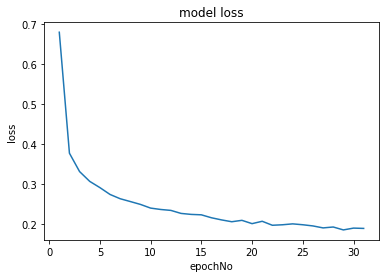

In [10]:
xpt = [i for i in range(1, 32)]
plt.plot(xpt, history.history['loss'])
plt.xlabel('epochNo')
plt.ylabel('loss')
plt.title('model loss')
plt.show()

In [11]:
# evaluating the model

# model_saved = load_model('best_model.h5')
result = model.evaluate(
    test_images,
    to_categorical(test_labels),
    return_dict = True,
)

294/294 [==============================] - 0s 1ms/step - loss: 0.1103 - categorical_accuracy: 0.9661


In [12]:
print("Overall accuracy:", result['categorical_accuracy'])

Overall accuracy: 0.9660638570785522


In [13]:
print(model.layers)

[<keras.layers.core.dense.Dense object at 0x7f113df63350>, <keras.layers.core.dropout.Dropout object at 0x7f10bc784a10>, <keras.layers.core.dense.Dense object at 0x7f10bc784ad0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f10b866a7d0>, <keras.layers.core.activation.Activation object at 0x7f10b85f44d0>, <keras.layers.core.dense.Dense object at 0x7f10b85d1310>]


In [14]:
print(model.layers[0])